In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator,interp1d
import kitcolors as kit 
from scipy.interpolate import interp1d


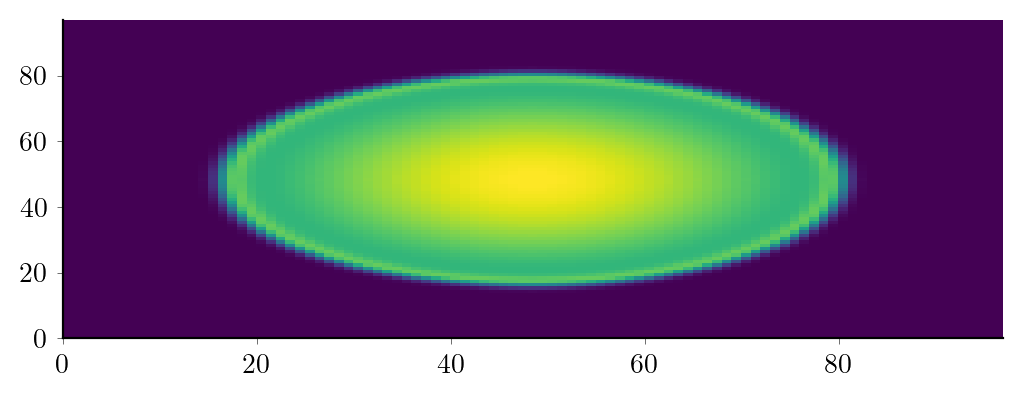

In [13]:
data1 = np.loadtxt("2020-12-12T08:09:34.184/data/rhofinal.txt",delimiter=",")
data2 = np.loadtxt("2020-12-12T08:22:43.115/data/rhofinal.txt",delimiter=",")

data = data[2:-2,2:-2]
data = data[2:-2,2:-2]
ny,nx = data.shape
ls = np.loadtxt("exactLineSource.txt",delimiter=",")
ls[0,0] = -2.5
ls[-1,0] = 2.5
X = np.linspace(-1.5,1.5,nx+1)
Y = np.linspace(-1.5,1.5,ny+1)
XX,YY = np.meshgrid(X,Y)
R = (XX**2+YY**2)**0.5
interpolant = interp1d(ls[:,0],ls[:,1])
REF = interpolant(R)
plt.pcolormesh(REF)

In [14]:
def plotls(data,name="tmp"):
    plt.style.use("kitish")
    fig,ax = plt.subplots(figsize=(3.0,2.6)) 
    p = ax.pcolormesh(X,Y,data,cmap = "plasma",vmin = 0,vmax = 0.4,rasterized = True)
    ax.set_xticks([-1.5,1.5])
    ax.set_xticklabels([r"$-1.5$", r"$1.5$"])
    ax.set_xlabel(r"$x$ [cm]",labelpad = -5)
    ax.set_yticks([-1.5,1.5])
    ax.set_yticklabels([r"$-1.5$", r"$1.5$"])
    ax.set_ylabel(r"$y$ [cm]",labelpad = -15)

    #cbaxes = fig.add_axes([1.05, 0.0, 0.05, 0.5]) 
    p.cmap.set_over("gray")
    clb = fig.colorbar(p,orientation = "vertical",ax=ax,ticks = [ 0,0.2,0.4],
                       extend='max',extendfrac=0.05,shrink = 0.55,pad = +0.04,aspect = 10)
    clb.ax.set_title(r"$\phi(x,y)$",horizontalalignment="center")
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
    ax.set_aspect('equal', 'box')
    ax.margins(x=0.0,y=0) 
    plt.setp(ax.spines.values(), linewidth=0)
    plt.savefig(f"{name}.pdf")

TypeError: Dimensions of C (104, 104) are incompatible with X (97) and/or Y (97); see help(pcolormesh)

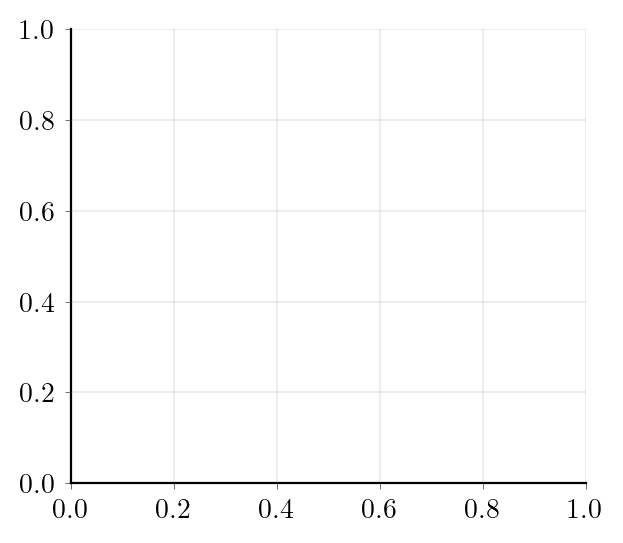

In [15]:
plotls(data1,name ="normal")
plotls(data2,name ="forthback")

In [140]:
np.max(REF)

0.39319